In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import scipy.stats as stats

In [3]:
df0 = pd.read_csv("train.csv")
df1 = pd.read_csv("test.csv")

In [4]:
df0["Set"] = [0]*len(df0)
df1["Set"] = [1]*len(df1)

In [5]:
df = pd.merge(df0, df1, how="outer")

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Set'],
      dtype='object')

In [7]:
## 카이제곱 검정
freq = pd.crosstab(index=df[df["Set"]==0]["Survived"],
                   columns=df[df["Set"]==0]["Pclass"])

In [8]:
freq

Pclass,1,2,3
Survived,,,
0.0,80,97,372
1.0,136,87,119


In [9]:
"pvalue: {}".format(round(stats.chi2_contingency(freq, correction=False)[1], 3))

'pvalue: 0.0'

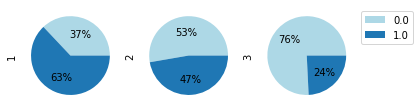

In [10]:
freq.plot(kind="pie",
          subplots=True,
          labels=None,
          colors=("LIGHTBLUE", "#1F77B4"),
          autopct="%.0f%%",
          legend=False)

plt.legend(freq.index,
           title=None,
           bbox_to_anchor=(1, 1))